# Evaluation Algorithms for MNIST
Dieses Notebook dient dazu alle Modelle miteinander zu vergleichen, dazu wurden die fertig trainierten Modelle in dem Directory ./MODEL abgelegt, hier werden alle geladen und miteinander verglichen 

In [34]:
# Imports
from sklearn.externals import joblib # Laden der Modelle
from mlxtend.data import loadlocal_mnist
from sklearn.model_selection import cross_val_predict # For Predictions
from sklearn.metrics import confusion_matrix # For CM
from sklearn.metrics import precision_score, recall_score # FOR PR/RC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score # For Cross Validation
from sklearn.metrics import roc_curve # Für die ROC-Kurve
from IPython.display import HTML, display# darstellung der Ergebnisslisten
from sklearn.metrics import precision_recall_curve
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Laden der Daten für die Predcitions
train_X, train_y = loadlocal_mnist(
        images_path='./Data/train-images.idx3-ubyte', 
        labels_path='./Data/train-labels.idx1-ubyte')
test_X, test_y = loadlocal_mnist(
        images_path='./Data/t10k-images.idx3-ubyte', 
        labels_path='./Data/t10k-labels.idx1-ubyte')
y_train_5 = (train_y == 5)
y_test_5 = (test_y == 5)

In [3]:
# hier lediglich die fertig trainierten Modelle laden
sgd_clf = joblib.load("./MODEL/MNIST_sgd_clf.pkl")
logReg_clf = joblib.load("./MODEL/MNIST_logReg_clf.pkl")

In [4]:
# Liste aller Modelle, welche wir im weiteren auswerten
trainedModels = [sgd_clf, logReg_clf]

# Accuracy
Bei der Accuracy misst man die Anzahl der richtig klassifizierten einheiten gegen alle 
Die Fragestellung lautet gegen was man testet
1) gegen die Testdaten
2) gegen die CV-Daten
im Weiteren arbeit ich mit cv-Daten

Dem folgenden Output kann man nicht blind vertrauen, da bestimmte Modelle erheblich besser performen. 
Am Beispiel von MNIST: Der Datensatz besteht aus 10% "5". Ein Classifier, welcher einfach auf 100% nicht "5" prognositiziert ist somit zu 90% richtig. Das ist der Grund warum die Accuracy nicht notgedrungen die präferierte Version für die Evaluierung von Classifiaction ist

In [14]:
accuracyList = [["Model", "Accuracys per CV"]]
for model in range(0, len(trainedModels),1):  
    interim = []
    interim.append(trainedModels[model])
    interim.append(cross_val_score(trainedModels[model], train_X, y_train_5, cv=3, scoring="accuracy"))
    accuracyList.append(interim)
    

C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit

In [11]:
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in accuracyList)
       )
))

Model,Accuracys per CV
"SGDClassifier(alpha=0.0001, average=False, class_weight=None, early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5, n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0, warm_start=False)",[0.9633 0.95695 0.9146 ]
"LogisticRegression(C=100000.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)",[0.97485 0.97305 0.9735 ]


# Confusion Matrix
Idee de Confusion Matrix = man zählt wie oft welche Klasse Richtig, oder eben Falsch klassifiziert wurde. 
hier haben wir die Ausgangslage, dass trainierte Modelle(auf Basis der Traindata) vorliegen. für das Testen gibt es nun zwei Möglichkeiten
1) Auf Basis von Crossvalidation innerhalb des Train-Sets
2) Auf Basis der Testdata
Im weiteren Arbeiten wir mit der 1) version mit einer CV von 3

## Interpretation Confusion Matrix
. in dem Binären bsp MNIST stellt die erste Zeile die Werte "nicht 5" dar. Somit wurden 52336, laug dem SGDC-Classifier als "richtig nicht 5" Klassifiziert, wobei die zweite Zeile "ist 5" 4361 Richtig und 1060 nicht erkannt wurde. <br>
### Precsion & Recall & F1-Score
<table border width=100% height=100>
<tbody>
<tr style="height: 22px;">
<td style="height: 22px;">Buzz-word</td>
<td style="height: 22px;">Erkl&auml;rung</td>
<td style="height: 22px;">Beispiel</td>
<td style="height: 22px;">&nbsp;</td>
<td style="height: 22px;">Praktische Anwendung</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px;">Confusion Matrix</td>
<td style="height: 22px;">Jede Reihe repr&auml;sentiert eine aktuelle Klasse, w&auml;hrend jede Spalte die pr&auml;diktiert Klasse darstellt</td>
<td style="height: 22px;">Somit wurden 52336, laug dem SGDC-Classifier als "richtig nicht 5" Klassifiziert, wobei die zweite Zeile "ist 5" 4361 Richtig und 1060 nicht erkannt wurde.</td>
<td style="height: 22px;">&nbsp;</td>
<td style="height: 22px;">&nbsp;</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px;">Precision</td>
<td style="height: 22px;">Mathematisch = TP/(TP+FP)</td>
<td style="height: 22px;">Relative Anzahl der richtig positiv Klassifizierten&nbsp;zu allen positiv Klassifizierten</td>
<td style="height: 22px;">&nbsp;Soll so hoch wie m&ouml;glich sein</td>
<td style="height: 22px;">Bsp f&uuml;r Wunsch"high Precision &amp; in Kaufnehme von low Recall" Bsp Content filter f&uuml;r Videomaterial. Es wird wohl besser sein Mehr videos welche eigentlich "gut" w&auml;ren als "schlecht zu klassifizeren und diesen bspw Kindern nicht zug&auml;nglich zu machen als andersherum"</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px;">Recall</td>
<td style="height: 22px;">Mathematisch = TP/(TP+FN)</td>
<td style="height: 22px;">&nbsp;Relative Anzahl der richtig positiv Klassifizierten&nbsp;zu allen richtig Klassifizierten</td>
<td style="height: 22px;">&nbsp;Soll so hoch wie m&ouml;glich sein</td>
<td style="height: 22px;">Bsp f&uuml;r Wunsch"high&nbsp;Recall&amp; in Kaufnehme von low Precision" Bsp&nbsp;automatische Auswertung von Bildmaterial von Diebstahl...Lieber Securtiy ein paar mal h&auml;ufiger raus als eigentlich n&ouml;tig, als diebstahl zulassen</td>
</tr>
<tr style="height: 22px;">
<td style="height: 22px;">F1</td>
<td style="height: 22px;">Mathematisch = (Precision*Recall)/(Precision+Recall)</td>
<td style="height: 22px;">&nbsp;</td>
<td style="height: 22px;">&nbsp;Soll so hoch wie m&ouml;glich sein</td>
<td style="height: 22px;">&nbsp;</td>
</tr>
</tbody>
</table>

In [21]:
# Evaluation Binary-Classifier
# hier ggf ausgabe als Tabelle

In [22]:
confusionMatrixList = [["Model Summary", "CM", "Precision", "Recall", "F1"]]
for model in range(0, len(trainedModels),1):
    interim = []
    y_train_pred = cross_val_predict(trainedModels[model], train_X, y_train_5, cv=3)
    interim.append(trainedModels[model])
    interim.append(confusion_matrix(y_train_5, y_train_pred))
    interim.append(precision_score(y_train_5, y_train_pred))
    interim.append(recall_score(y_train_5, y_train_pred))
    interim.append(f1_score(y_train_5, y_train_pred))
    
    
    
    
    
    confusionMatrixList.append(interim)


C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit

In [26]:
display(HTML(
   '<table border width=100% height=100><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in confusionMatrixList)
       )
))

Model,CM,Precision,Recall,F1
"SGDClassifier(alpha=0.0001, average=False, class_weight=None, early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5, n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0, warm_start=False)",[[52336 2243] [ 1060 4361]],0.6603573591762568,0.8044641210108836,0.7253222453222454
"LogisticRegression(C=100000.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)",[[54029 550] [ 1022 4399]],0.8888664376641746,0.811473897804833,0.8484088717454195


In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


[-1240055.24095435 -1239461.43861287 -1238300.92282501 ...
  1000939.19185372  1024426.52263646  1248437.63711961]


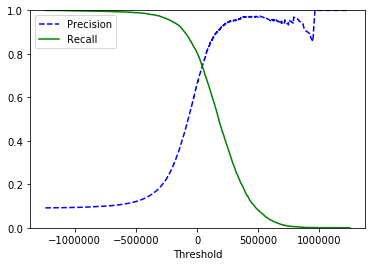

In [38]:
## Ändern des Threshodls für die Classification
# je Höher der Trashhold desto höher auch die 
y_scores = cross_val_predict(sgd_clf, train_X, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
print(thresholds)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Bis hierher habe ich lediglich die Daten abgerufen aber noch nicht Verändert. auf Basis dieser Information kann ich aber je nach Bedarf nun aber Recall & Precesiion einstellen je nach Anwendungszenario